# Import Liabraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

## Imported Dataset

In [2]:
dfins = pd.read_csv(r"C:\Users\nrupa\OneDrive\Desktop\My Data Sccience Project\Regression\Dataset\insurance.csv")

## Check the Data for Outlier

In [3]:
dfins.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dfins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
dfins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
dfins.isna().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
dfins.dtypes

age           int64
gender       object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
dfins.dtypes=='object'

age         False
gender       True
bmi         False
children    False
smoker       True
region       True
charges     False
dtype: bool

In [9]:
dfins.dtypes[dfins.dtypes=='object'].index

Index(['gender', 'smoker', 'region'], dtype='object')

In [10]:
dfins[['gender', 'smoker', 'region']].head()

,gender,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [11]:
dfins

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [12]:
pd.get_dummies(dfins).corr()

,age,bmi,children,charges,gender_female,gender_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
gender_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
gender_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


<AxesSubplot:>

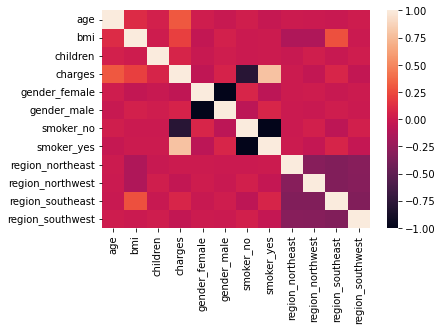

In [13]:
sns.heatmap(pd.get_dummies(dfins).corr())

<AxesSubplot:>

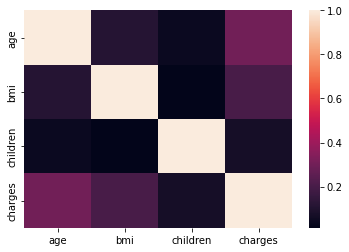

In [14]:
sns.heatmap(dfins.corr())

C:\Users\nrupa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


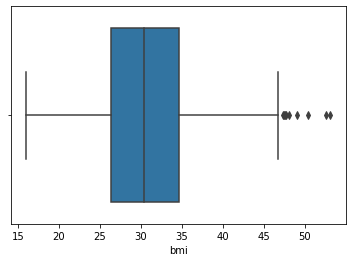

In [16]:
sns.boxplot(dfins['bmi'])
plt.show()

## Outlier Detected

## Data Cleansing

In [17]:
dfins['bmi'].skew()

0.2840471105987448

C:\Users\nrupa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


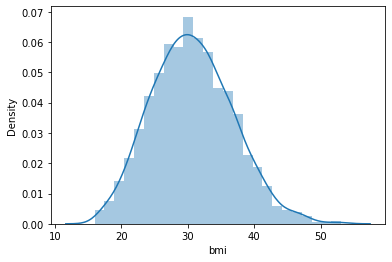

In [18]:
sns.distplot(dfins['bmi'])
plt.show()

In [20]:
mean = dfins['bmi'].mean()

In [21]:
mean

30.663396860986538

In [22]:
std =dfins['bmi'].std()

In [23]:
std

6.098186911679017

In [24]:
lower = mean - (3*std)

In [25]:
lower

12.368836125949485

In [26]:
upper = mean + (3*std)

In [27]:
upper

48.95795759602359

In [28]:
dfins['bmi'][dfins['bmi']<lower]

Series([], Name: bmi, dtype: float64)

In [30]:
dfins[dfins['bmi']<lower]

,age,gender,bmi,children,smoker,region,charges


In [32]:
dfins['bmi'][dfins['bmi']>upper]

116     49.06
847     50.38
1047    52.58
1317    53.13
Name: bmi, dtype: float64

In [31]:
dfins[dfins['bmi']>upper]

,age,gender,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


In [33]:
dfins[ (dfins ['bmi'] < lower) | (dfins ['bmi'] > upper)]

,age,gender,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


In [35]:
dfins[ (dfins ['bmi'] > lower) & (dfins ['bmi'] < upper)]

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Rectifying Outlier

In [36]:
dfins['bmi'] = dfins['bmi'].map(lambda x :lower if x < lower else upper if x > upper else x)

In [37]:
dfins[ (dfins ['bmi'] < lower) | (dfins ['bmi'] > upper)]

,age,gender,bmi,children,smoker,region,charges


## Encoading Techiques

In [39]:
ord1 = OrdinalEncoder()

In [43]:
ord1.fit(dfins[['smoker']])

OrdinalEncoder()

In [45]:
dfins[['smoker']]=ord1.transform(dfins[['smoker']])

In [47]:
dfins=pd.get_dummies(dfins, drop_first = True)

In [48]:
dfins

,age,bmi,children,smoker,charges,gender_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1.0,16884.92400,0,0,0,1
1,18,33.770,1,0.0,1725.55230,1,0,1,0
2,28,33.000,3,0.0,4449.46200,1,0,1,0
3,33,22.705,0,0.0,21984.47061,1,1,0,0
4,32,28.880,0,0.0,3866.85520,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0.0,10600.54830,1,1,0,0
1334,18,31.920,0,0.0,2205.98080,0,0,0,0
1335,18,36.850,0,0.0,1629.83350,0,0,1,0
1336,21,25.800,0,0.0,2007.94500,0,0,0,1


## Segregating Dependent and Independent Data

In [49]:
X=dfins.drop('charges',axis=1)

In [50]:
y=dfins['charges']

## Importing Models

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor

In [52]:
algo=[LinearRegression(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(),XGBRegressor()]

## Automating

In [53]:
for model in algo :
    
    l = []
    
    for i in range(0,50):
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=i)
        model.fit(X_train,y_train)
        
        s = model.score(X_test,y_test)
        l.append(s)
    
    print()
    print('model name ==', model.__class__.__name__, end='==>')
    m = max(l)
    print(m)
    print('Random_state == ',l.index(m))
    print()
    print('*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*')


model name == LinearRegression==>0.7999873321465238
Random_state ==  0

*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*

model name == SVR==>-0.04669111408900517
Random_state ==  15

*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*

model name == KNeighborsRegressor==>0.28283345997554843
Random_state ==  0

*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*

model name == DecisionTreeRegressor==>0.8257191169274632
Random_state ==  13

*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*

model name == RandomForestRegressor==>0.902999246514527
Random_state ==  13

*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*

model name == GradientBoostingRegressor==>0.9236672667379371
Random_state ==  13

*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*

model name == AdaBoostRegressor==>0.8620758306602647
Random_state ==  13

*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*

model name == XGBRegressor==>0.8745946195845592
Random_state ==  13

*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*
